In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# evaluation metrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# pickle
import pickle

# overfitting 
from sklearn.linear_model import Ridge, Lasso

# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Future warnings

#### 1) Problem Statement

In [ ]:
Predict medical insurance price/ premium base on independent features

#### 2) Data Gathering

In [4]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3) EDA

#### Missing

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isna().mean() # mssing in %

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Outliers detection

<AxesSubplot:>

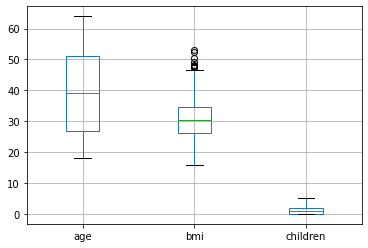

In [10]:
df[["age","bmi","children"]].boxplot()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

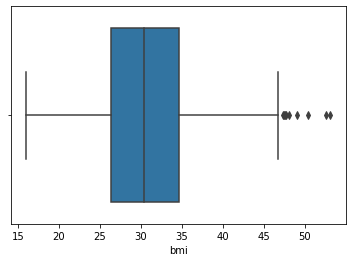

In [11]:
sns.boxplot(df["bmi"])

In [14]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1
uppertail = q3 + 1.5 *iqr
print(uppertail)
df.loc[(df["bmi"]>uppertail)]

47.290000000000006


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [15]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df.corr()

C:\Users\Admin\AppData\Local\Temp/ipykernel_4220/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### vif

In [18]:
df1 = df.drop(["charges","sex","smoker","region"],axis=1)
x_constant= sm.add_constant(df1)
vif_list = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
s1 = pd.Series(vif_list,index = x_constant.columns)
s1

const       31.954929
age          1.013816
bmi          1.012152
children     1.001874
dtype: float64

<AxesSubplot:>

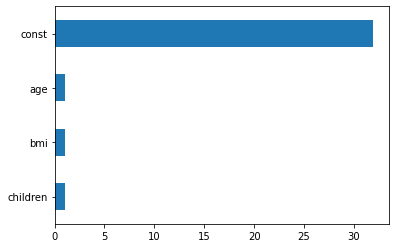

In [19]:
s1 = pd.Series(vif_list,index = x_constant.columns)
s1.sort_values().plot(kind="barh")

#### 4) Feature Engineering

In [ ]:
# treament of missing > .fillna()
# outliers >> either transformation or imputation
# rename

In [20]:
df.rename(columns={"sex":"gender"},inplace=True)

In [21]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df["gender"].replace({"male":0,"female":1},inplace=True)

In [23]:
df["gender"].value_counts()

0    676
1    662
Name: gender, dtype: int64

In [24]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)

In [26]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

#### encoding

In [27]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df = pd.get_dummies(df,columns=["region"])
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


##### 5. feature selection

In [ ]:
# df.corr()
# vif

#### 6) Data spliting

In [29]:
x = df.drop("charges",axis=1)
y = df["charges"]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

#### 7) Model selection

In [30]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

#### 8) Evaluation

##### 8.1 testing

In [31]:
y_pred_test  = lr_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33596915.851361446
mean absolue error
 4181.194473753639
r2 score is  0.7835929767120724
adjusted r2 score 0.776043894504354


#### 8.2 On Training Data

In [32]:
y_pred_train  = lr_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37277681.70201868
mean absolue error
 4208.234572492218
r2 score is  0.7417255854683333
adjusted r2 score 0.7395326894958947


#### Ridge

In [33]:
ridge_model = Ridge(alpha=1.0) #  alpha=1. = lambda
ridge_model.fit(x_train,y_train)

Ridge()

In [34]:
# On testing data
y_pred_test  = ridge_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33642947.835070975
mean absolue error
 4193.348192170579
r2 score is  0.7832964719788793
adjusted r2 score 0.7757370465827937


In [35]:
# on training data
y_pred_train  = ridge_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37280674.08958883
mean absolue error
 4217.9152386751775
r2 score is  0.7417048530323972
adjusted r2 score 0.739511781029842


### Lasso

In [36]:
lasso_model = Lasso(alpha=1.0) #  alpha=1. = lambda
lasso_model.fit(x_train,y_train)

Lasso()

In [37]:
# On testing data
y_pred_test  = lasso_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33605932.26390232
mean absolue error
 4182.29697940532
r2 score is  0.7835348995061961
adjusted r2 score 0.7759837913494355


In [38]:
# on training data
y_pred_train  = lasso_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37277711.06031092
mean absolue error
 4208.468848637636
r2 score is  0.7417253820625582
adjusted r2 score 0.7395324843630894


#### check slope for feature selection

In [39]:
lasso_model.coef_

array([ 2.56973787e+02,  1.39773763e+01,  3.36892172e+02,  4.24687204e+02,
        2.36444097e+04,  6.49104379e+02,  2.78116811e+02, -0.00000000e+00,
       -1.52448881e+02])

<AxesSubplot:>

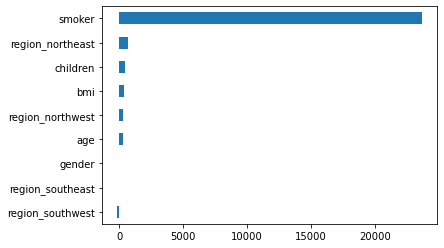

In [40]:
s1 = pd.Series(lasso_model.coef_,index=x.columns)
s1.sort_values().plot(kind="barh")

In [ ]:
# conclusion : gender has 0 slope therefore we can drop

In [41]:
x_train1 = x_train.drop("gender",axis=1)
lasso_model = Lasso(alpha=1.0) #  alpha=1. = lambda
lasso_model.fit(x_train1,y_train)

Lasso()

In [42]:
# On testing data
x_test1 =  x_test.drop("gender",axis=1)
y_pred_test  = lasso_model.predict(x_test1) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test1.shape[0]-1))/(x_test1.shape[0]-x_test1.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33610155.04865906
mean absolue error
 4182.911464796806
r2 score is  0.7835076993821362
adjusted r2 score 0.7768206785136307


In [ ]:
# ridge and lasso no change in MSE OR R2

### Hyperparameter Tuning

In [ ]:
# alpha = lambda  =1.0 default

In [43]:
np.arange(0.01,3,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

In [45]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
gdsearchCv = GridSearchCV(estimator=estimator_ridge,param_grid=parameter_grid,cv=5)
gdsearchCv.fit(x_train,y_train)
gdsearchCv.best_estimator_

Ridge(alpha=0.9600000000000001)

In [46]:
# On testing data
ridge_model = gdsearchCv.best_estimator_ # alpha = 0.69
y_pred_test  = ridge_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33641004.689312056
mean absolue error
 4192.8617988327505
r2 score is  0.7833089883179196
adjusted r2 score 0.7757499995383121


In [47]:
# on training data
ridge_model = gdsearchCv.best_estimator_ # alpha = 0.69
y_pred_train  = ridge_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37280440.76364111
mean absolue error
 4217.530143029805
r2 score is  0.7417064696061697
adjusted r2 score 0.739513411329241


#### RandomizedSearchCV

In [50]:
estimator_ridge = Ridge()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
rdsearchCv = RandomizedSearchCV(estimator_ridge,parameter_grid,cv=5)
rdsearchCv.fit(x_train,y_train)
rdsearchCv.best_estimator_

Ridge(alpha=0.8200000000000001)

In [51]:
# On testing data
ridge_model = rdsearchCv.best_estimator_ # alpha = 0.8200000000000001
y_pred_test  = ridge_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33634269.86337287
mean absolue error
 4191.157600307927
r2 score is  0.7833523691937211
adjusted r2 score 0.7757948937004788


In [52]:
# on training data
ridge_model = gdsearchCv.best_estimator_ # 
y_pred_train  = ridge_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37281496.93887139
mean absolue error
 4219.165581070908
r2 score is  0.7416991520095063
adjusted r2 score 0.7395060316020399


#### Lasso

In [54]:
estimator_lasso = Lasso()
parameter_grid = {"alpha":np.arange(0.01,3,0.01)}
gdsearchCv = GridSearchCV(estimator=estimator_lasso,param_grid=parameter_grid,cv=5)
gdsearchCv.fit(x_train,y_train)
gdsearchCv.best_estimator_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.9899999999999998)

In [55]:
# On testing data
lasso_model = gdsearchCv.best_estimator_
y_pred_test  = lasso_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 33624091.89154799
mean absolue error
 4184.51954664006
r2 score is  0.7834179283240732
adjusted r2 score 0.7758627397772385


In [56]:
# on training data
lasso_model = gdsearchCv.best_estimator_
y_pred_train  = lasso_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 37277944.85621794
mean absolue error
 4208.949569674095
r2 score is  0.7417237622327231
adjusted r2 score 0.739530850779982


#### Final model selected based on MSE and R2 score

In [57]:
# lr_model
with open("Linear_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [58]:
project_data = {"gender": {"male":0,"female":1},
                "smoker" : {"yes":1,"no":0},
                "columns":list(x.columns)}
project_data

{'gender': {'male': 0, 'female': 1},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [60]:
import json

In [61]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)

In [62]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')